In [6]:
!pip install category_encoders
!pip install flaml[automl] matplotlib openml
!pip install dask[dataframe]



!pip install xgboost
!pip install catboost
!pip install lightgbm


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/158.0 kB ? eta -:--:--
   -- ------------------------------------- 10.2/158.0 kB ? eta -:--:--
   ---------- ---------------------------- 41.0/158.0 kB 495.5 kB/s eta 0:00:01
   ----------------------------- -------- 122.9/158.0 kB 901.1 kB/s eta 0:00:01
   ---------------------------------------- 158.0/158.0 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/94.4 kB ? eta -:--:--
   ---------------------------------------- 94.4/94.4 kB 5.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.8 MB 7.0 MB/s eta 0:00:01
   ---- ----------------------------------- 0.2/1.8 MB 2.6 MB/s eta 0:00:01
   ----- ---------------------------------- 0.3/1.8 MB 3.1 MB/s eta 0:00:01
   ----------- ---------------------------- 0.5/1.8 MB 3.2 MB/s eta 0:

In [3]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle competitions download -c rohlik-sales-forecasting-challenge-v2

 70% 33.0M/47.3M [00:00<00:00, 90.7MB/s]
100% 47.3M/47.3M [00:00<00:00, 106MB/s] 


In [2]:
!unzip rohlik-sales-forecasting-challenge-v2.zip -d /content

Archive:  rohlik-sales-forecasting-challenge-v2.zip
replace /content/calendar.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/calendar.csv   
  inflating: /content/inventory.csv  
  inflating: /content/sales_test.csv  
  inflating: /content/sales_train.csv  
  inflating: /content/solution.csv   
  inflating: /content/test_weights.csv  


In [26]:
import pandas as pd


#repalce all of these with your own path ^_^

training = pd.read_csv('C://Users/DELL/Documents/sales_train.csv', parse_dates=['date'])
test = pd.read_csv('C://Users/DELL/Documents/sales_test.csv', parse_dates=['date'])
submission = pd.read_csv("C://Users/DELL/Documents/solution.csv")

inventory = pd.read_csv('C://Users/DELL/Documents/inventory.csv')
test_weights = pd.read_csv("C://Users/DELL/Documents/test_weights.csv")
calender = pd.read_csv("C://Users/DELL/Documents/calendar.csv", parse_dates=['date'])


In [27]:
training.isna().sum()/training.shape[0] #percentage of missing values

display(training.shape)#before dropping nans

training.dropna(inplace=True)

display(training.shape)#after dropping nans

training.duplicated().sum() #checking for duplicates

(4007419, 14)

(4007367, 14)

0

In [7]:
training.nunique() #checking unique values for the columns

training.info() #checking data types of columns

correlation_train=training.drop(["date","warehouse"],axis=1) #checking correlation of numerical columns


corr_plot_mat=correlation_train.corr()

corr_plot_mat




<class 'pandas.core.frame.DataFrame'>
Index: 4007367 entries, 0 to 4007418
Data columns (total 14 columns):
 #   Column           Dtype         
---  ------           -----         
 0   unique_id        int64         
 1   date             datetime64[ns]
 2   warehouse        object        
 3   total_orders     float64       
 4   sales            float64       
 5   sell_price_main  float64       
 6   availability     float64       
 7   type_0_discount  float64       
 8   type_1_discount  float64       
 9   type_2_discount  float64       
 10  type_3_discount  float64       
 11  type_4_discount  float64       
 12  type_5_discount  float64       
 13  type_6_discount  float64       
dtypes: datetime64[ns](1), float64(11), int64(1), object(1)
memory usage: 458.6+ MB


,unique_id,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount
unique_id,1.000000,-0.003557,0.021333,-0.013103,-0.003725,-0.004146,-0.002557,-0.010543,-0.001311,0.046378,0.010416,0.016041
total_orders,-0.003557,1.000000,0.100301,-0.014082,-0.006823,0.010693,-0.019337,0.009782,-0.002465,0.046652,-0.017894,-0.002996
sales,0.021333,0.100301,1.000000,-0.043014,0.012252,0.130468,0.002256,0.063841,0.000298,0.011782,0.004624,-0.037561
sell_price_main,-0.013103,-0.014082,-0.043014,1.000000,-0.007730,0.033392,-0.003021,-0.005896,0.048547,-0.041983,0.012257,0.021170
availability,-0.003725,-0.006823,0.012252,-0.007730,1.000000,-0.008022,0.001745,0.000406,-0.000905,-0.043244,-0.003921,-0.007375
type_0_discount,-0.004146,0.010693,0.130468,0.033392,-0.008022,1.000000,-0.003972,-0.008960,-0.000809,-0.021388,0.010554,-0.006409
type_1_discount,-0.002557,-0.019337,0.002256,-0.003021,0.001745,-0.003972,1.000000,-0.001493,-0.000147,-0.004738,-0.001062,-0.003157
type_2_discount,-0.010543,0.009782,0.063841,-0.005896,0.000406,-0.008960,-0.001493,1.000000,-0.000378,-0.011303,-0.001678,-0.010513
type_3_discount,-0.001311,-0.002465,0.000298,0.048547,-0.000905,-0.000809,-0.000147,-0.000378,1.000000,-0.001200,-0.000269,0.004867
type_4_discount,0.046378,0.046652,0.011782,-0.041983,-0.043244,-0.021388,-0.004738,-0.011303,-0.001200,1.000000,0.005557,-0.020697


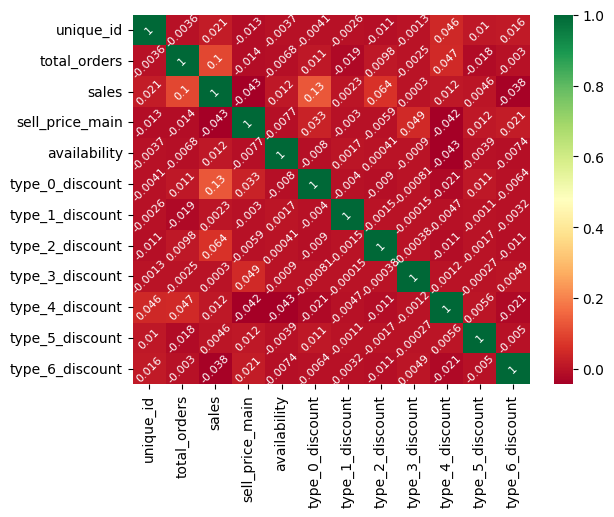

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_plot_mat,annot=True,cmap="RdYlGn",annot_kws={"rotation":45,"size":8})#??? no correlation could be because of nonlinearity or non-normal distribution

plt.show()

In [4]:
training.shape[1]-test.shape[1]# 2 missing columns


#making a list of mising columns
test_missing=[]

for i in training.columns.tolist():
  if i not in test.columns.tolist():
    test_missing.append(i)



display(test_missing)#missing target value sales (expected) availability column must be either dropped or made

['sales', 'availability']

In [28]:
Frankfurt_1 = calender[(calender["date"] >= "2020-08-01 00:00:00") & (calender["warehouse"] =="Frankfurt_1")]
Prague_2 = calender[(calender["date"] >= "2020-08-01 00:00:00") & (calender["warehouse"] =="Prague_2")]
Brno_1 = calender[(calender["date"] >= "2020-08-01 00:00:00") & (calender["warehouse"] =="Brno_1")]
Munich_1 = calender[(calender["date"] >= "2020-08-01 00:00:00") & (calender["warehouse"] =="Munich_1")]
Prague_3 = calender[(calender["date"] >= "2020-08-01 00:00:00") & (calender["warehouse"] =="Prague_3")]
Prague_1 = calender[(calender["date"] >= "2020-08-01 00:00:00") & (calender["warehouse"] =="Prague_1")]
Budapest_1 = calender[(calender["date"] >= "2020-08-01 00:00:00") & (calender["warehouse"] =="Budapest_1")]

def process_calender(df):

    df = df.sort_values('date').reset_index(drop=True)

    # 1. days till next holiday
    df['next_holiday'] = df.loc[df['holiday'] == 1, 'date'].shift(-1)
    df['next_holiday'] = df['next_holiday'].bfill()
    df['days_to_holiday'] = (df['next_holiday'] - df['date']).dt.days
    df.drop(columns=['next_holiday'], inplace=True)

    # 2. days till the shops close
    df['shops_closed_date'] = df.loc[df['shops_closed'] == 1, 'date'].shift(-1)
    df['shops_closed_date'] = df['shops_closed_date'].bfill()
    df['days_till_shops_closed'] = (df['shops_closed_date'] - df['date']).dt.days
    df.drop(columns=['shops_closed_date'], inplace=True)

    # 3. day_after_closing
    df['day_after_closing'] = (
        (df['shops_closed'] == 0) & (df['shops_closed'].shift(1) == 1)
    ).astype(int)

    # 4. long_weekend
    df['long_weekend'] = (
        (df['shops_closed'] == 1) & (df['shops_closed'].shift(1) == 1)
    ).astype(int)

    # 5. weekday
    df['weekday'] = df['date'].dt.weekday  # 0 (monday) - 6 (sunday)

    # 6. days since last holiday
    df['last_holiday_date'] = df.loc[df['holiday'] == 1, 'date'].shift(1)
    df['last_holiday_date'] = df['last_holiday_date'].ffill()
    df['days_since_holiday'] = (df['date'] - df['last_holiday_date']).dt.days
    df["days_since_holiday"] = df["days_since_holiday"].bfill()
    df.drop(columns=['last_holiday_date'], inplace=True)

    # 7. holiday season
    df['holiday_season'] = df['date'].apply(lambda x: 1 if (x.month == 12 and x.day >= 20) or (x.month == 1 and x.day <= 5) else 0)

    # 8. week of month
    df['week_of_month'] = df['date'].apply(lambda x: (x.day - 1) // 7 + 1)

    # 9. quarter
    df['quarter'] = df['date'].dt.quarter

    # 10. is weekend
    df['is_weekend'] = df['date'].dt.weekday.isin([5, 6]).astype(int)

    return df


dfs = ['Frankfurt_1', 'Prague_2', 'Brno_1', 'Munich_1', 'Prague_3', 'Prague_1', 'Budapest_1']

processed_dfs = [process_calender(globals()[df]) for df in dfs]

calender_extended = pd.concat(processed_dfs).sort_values('date').reset_index(drop=True)


In [29]:
train_calender = training.merge(calender_extended, on=['date', 'warehouse'], how='left')
train_inventory = train_calender.merge(inventory, on=['unique_id', 'warehouse'], how='left')
train_data = train_inventory.merge(test_weights, on=['unique_id'], how='left')

test_calendar = test.merge(calender_extended, on=['date', 'warehouse'], how='left')
test_data = test_calendar.merge(inventory, on=['unique_id', 'warehouse'], how='left')

In [6]:
train_data.shape

(4007367, 36)

In [30]:
#model testing starting of with something small ie polynomial regression


#dealing with categorical data might remove if we change model
from category_encoders import CatBoostEncoder # great for time series stuff








weights=train_data["weight"]




final_train=train_data.drop(["unique_id","availability","holiday_name","weight"],axis=1)




X_train=final_train.drop("sales",axis=1)
y_train=final_train["sales"]



final_test=test_data.drop(["unique_id","holiday_name"],axis=1)  #kept the date column in both data sets because i can

train_categorical=[x for x in final_train.columns if final_train[x].dtype=="object"]

train_encoder=CatBoostEncoder(cols=train_categorical,handle_unknown="value",sigma=2,a=0.5)
train_encoder.fit(X_train,y_train)


X_train_encoded=train_encoder.transform(X_train)
X_test_encoded=train_encoder.transform(final_test)









X_train_encoded #CAtboost has too much memory usage but probably the best possible encoder we can use for this maybe try parallelization?



,date,warehouse,total_orders,sell_price_main,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,...,holiday_season,week_of_month,quarter,is_weekend,product_unique_id,name,L1_category_name_en,L2_category_name_en,L3_category_name_en,L4_category_name_en
0,2024-03-10,102.934227,6436.0,646.26,0.00000,0.0,0.0,0.0,0.15312,0.0,...,0,2,1,1,2375,21.777912,121.769960,90.182500,87.327086,136.896533
1,2021-05-25,102.934227,4663.0,455.96,0.00000,0.0,0.0,0.0,0.15025,0.0,...,0,4,2,0,2375,21.777912,121.769960,90.182500,87.327086,136.896533
2,2021-12-20,102.934227,6507.0,455.96,0.00000,0.0,0.0,0.0,0.15025,0.0,...,1,3,4,0,2375,21.777912,121.769960,90.182500,87.327086,136.896533
3,2023-04-29,102.934227,5463.0,646.26,0.20024,0.0,0.0,0.0,0.15312,0.0,...,0,5,2,1,2375,21.777912,121.769960,90.182500,87.327086,136.896533
4,2022-04-01,102.934227,5997.0,486.41,0.00000,0.0,0.0,0.0,0.15649,0.0,...,0,1,2,0,2375,21.777912,121.769960,90.182500,87.327086,136.896533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4007362,2023-06-21,146.635028,9988.0,34.06,0.00000,0.0,0.0,0.0,0.00000,0.0,...,0,3,2,0,2422,27.595888,114.425298,122.492933,151.221721,104.395349
4007363,2023-06-24,146.635028,8518.0,34.06,0.00000,0.0,0.0,0.0,0.00000,0.0,...,0,4,2,1,2422,27.595888,114.425298,122.492933,151.221721,104.395349
4007364,2023-06-23,146.635028,10424.0,34.06,0.00000,0.0,0.0,0.0,0.00000,0.0,...,0,4,2,0,2422,27.595888,114.425298,122.492933,151.221721,104.395349
4007365,2023-06-22,146.635028,10342.0,34.06,0.00000,0.0,0.0,0.0,0.00000,0.0,...,0,4,2,0,2422,27.595888,114.425298,122.492933,151.221721,104.395349


In [31]:
from flaml import AutoML
automl=AutoML()

settings = {
    "time_budget": 3000,  
    "estimator_list":["lgbm"],
    "metric": "mae",  
    "log_file_name": "flaml.log", 
    "eval_method": "cv" ,
    "task":"regression"
}


automl.fit(X_train_encoded,y_train,sample_weight=weights,**settings)



[flaml.automl.logger: 12-20 21:09:23] {1728} INFO - task = regression
[flaml.automl.logger: 12-20 21:09:23] {1739} INFO - Evaluation method: cv
[flaml.automl.logger: 12-20 21:09:27] {1838} INFO - Minimizing error metric: mae
[flaml.automl.logger: 12-20 21:09:27] {1955} INFO - List of ML learners in AutoML Run: ['lgbm']
[flaml.automl.logger: 12-20 21:09:27] {2258} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 12-20 21:10:13] {2393} INFO - Estimated sufficient time budget=462744s. Estimated necessary time budget=463s.
[flaml.automl.logger: 12-20 21:10:13] {2442} INFO -  at 99.1s,	estimator lgbm's best error=56.8991,	best estimator lgbm's best error=56.8991
[flaml.automl.logger: 12-20 21:10:13] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 12-20 21:11:02] {2442} INFO -  at 147.9s,	estimator lgbm's best error=56.8991,	best estimator lgbm's best error=56.8991
[flaml.automl.logger: 12-20 21:11:02] {2258} INFO - iteration 2, current learner lgbm
[flaml

In [32]:
#prediction
'''best_model=grid.best_estimator_'''
prediction=automl.predict(X_test_encoded)

In [33]:
prediction_df=pd.DataFrame(prediction,columns=["sales"])


submission["sales_hat"]=prediction_df["sales"]

submission

,id,sales_hat
0,1226_2024-06-03,33.379586
1,1226_2024-06-11,131.563628
2,1226_2024-06-13,103.467151
3,1226_2024-06-15,131.929315
4,1226_2024-06-09,33.043600
...,...,...
47016,4572_2024-06-03,66.549185
47017,3735_2024-06-04,118.208347
47018,3735_2024-06-03,140.080810
47019,2129_2024-06-03,27.097938


In [34]:
submission.to_csv("C://Users/DELL//Documents//submission1.csv",index=False) # replace this with your own path <_>

In [ ]:

dir(XGBRFRegressor)

In [ ]:
!pip install xgboost